In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/My Drive/ST456/w4')
from BS_Fun import *
from tf_Fun4 import *
initialisation_tf()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.7.0


In [ ]:
def generate_sample_no_noise(S=10,K=np.arange(5,21,1),
                             T=1,r=0,true_sigma=np.arange(0.1,8,0.05)):
    '''
    We receive data over different calls, and would like to recover sigma
    Assume that we have no noise in the data
    '''
    trial=BS_Options_Pricing_sigma(S,K,T,r,true_sigma)
    trial.make_calls()
    data=df(trial.calls).transpose()
    data.reset_index(inplace=True)
    data.columns=['sig']+K.tolist()
    return data
data=generate_sample_no_noise()
y = data.pop('sig')
X = data
feature_normaliser = layers.Normalization(input_shape=[16], axis=1,name='normaliser')
feature_normaliser.adapt(X)

In [ ]:
def generate_sample_with_noise(S=10,K=np.arange(5,21,1),
                             T=1,r=0,true_sigma=np.arange(0.1,8,0.02),
                              mu_noise=0,sigma_noise=1):
    '''
    We receive data over different calls, and would like to recover sigma
    Assume that we have no noise in the data
    '''
    trial=BS_Options_Pricing_sigma_with_noise(S,K,T,r,true_sigma,mu_noise,sigma_noise)
    trial.make_calls()
    data=df(trial.calls).transpose()
    data.reset_index(inplace=True)
    data.columns=['sig']+K.tolist()
    return data

In [ ]:
data_val=generate_sample_with_noise()
y_val = data_val.pop('sig')
X_val = data_val

In [ ]:
m1=Model2_make(feature_normaliser,dropout=True,name='SGD_w_dropout',dropoutrate=0.5)
h1,m1=Model_fit(m1,X,y,X_val,y_val,epochs=200)
m2=Model2_make(feature_normaliser,dropout=False,name='SGD')
h2,m2=Model_fit(m2,X,y,X_val,y_val,epochs=200)

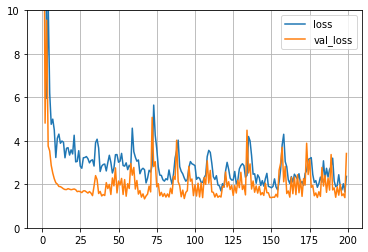

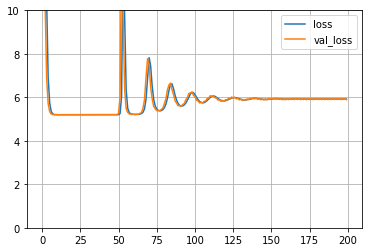

In [ ]:
df(h1.history).plot(ylim=(0,10),grid=True)
df(h2.history).plot(ylim=(0,10),grid=True)

### Homework space:

In [ ]:
m1=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMpropdropout_0.5',dropoutrate=0.5)
h1,m1=Model_fit(m1,X,y,X_val,y_val)
m2=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMpropdropout_0.2',dropoutrate=0.2)
h2,m2=Model_fit(m2,X,y,X_val,y_val)
m3=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMdropout_0.1',dropoutrate=0.1)
h3,m3=Model_fit(m3,X,y,X_val,y_val)
m4=Model2_make(feature_normaliser,dropout=False,learning_rate=0.05,Adam=True,name='ADAM_NOdropout')
h4,m4=Model_fit(m4,X,y,X_val,y_val)

In [ ]:
def merge_histories(array_of_history,name='loss'):
    h1,h2,h3,h4=array_of_history
    D=df({'ADAMdropout_0.5':h1.history[name]})
    D=D.join(df({'ADAMdropout_0.2':h2.history[name]}))
    D=D.join(df({'ADAMdropout_0.1':h3.history[name]}))
    D=D.join(df({'ADAM_NOdropout':h4.history[name]}))
    return D

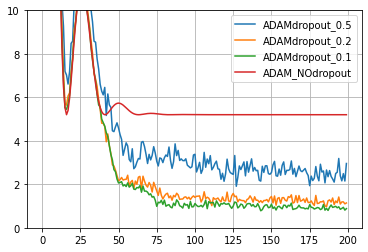

In [ ]:
merge_histories([h1,h2,h3,h4]).plot(ylim=(0,10),grid=True)

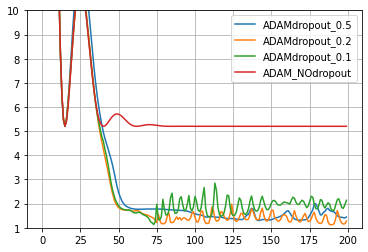

In [ ]:
merge_histories([h1,h2,h3,h4],'val_loss').plot(ylim=(1,10),grid=True)

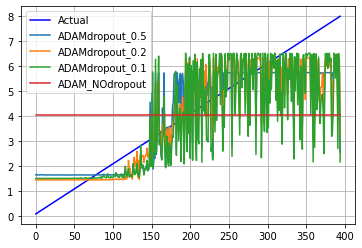

In [ ]:
# MP=MakePrediction([m1,m2,m3,m4],X_train.sort_index(),y_train.sort_index())
MP=MakePrediction([m1,m2,m3,m4],X_val,y_val)
MP.run_basic_plot(names=['ADAMdropout_0.5','ADAMdropout_0.2','ADAMdropout_0.1','ADAM_NOdropout'],
                 color=['b']+plt.rcParams['axes.prop_cycle'].by_key()['color'][:4])

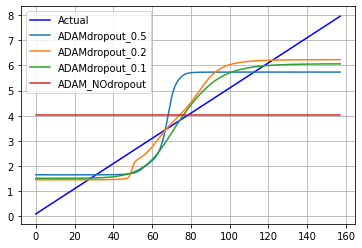

In [ ]:
MP=MakePrediction([m1,m2,m3,m4],X,y)
MP.run_basic_plot(names=['ADAMdropout_0.5','ADAMdropout_0.2','ADAMdropout_0.1','ADAM_NOdropout'],
                 color=['b']+plt.rcParams['axes.prop_cycle'].by_key()['color'][:4])

In [ ]:
m1=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMpropdropout_0.5',dropoutrate=0.5)
m2=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMpropdropout_0.2',dropoutrate=0.2)
m3=Model2_make(feature_normaliser,dropout=True,learning_rate=0.05,Adam=True,name='ADAMpropdropout_0.1',dropoutrate=0.1)
m4=Model2_make(feature_normaliser,dropout=False,learning_rate=0.05,Adam=True,name='ADAM_NOdropout')
ITAC=ImplementTrainAndCollect(X,y,[m1,m2,m3,m4])
ITAC.implement_all()


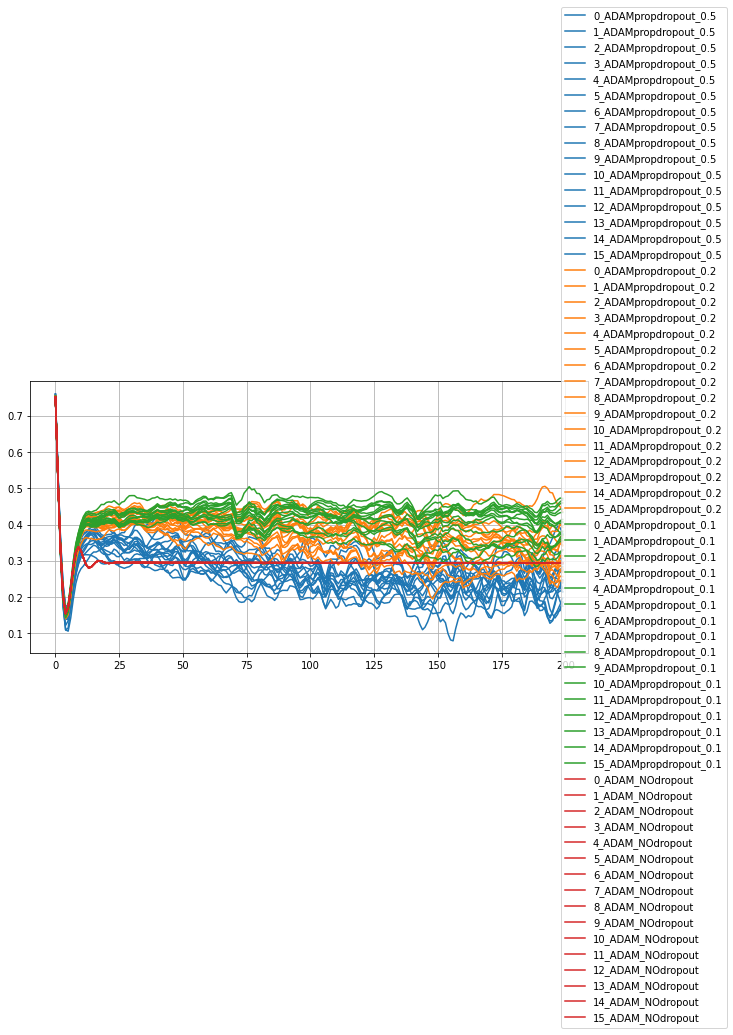

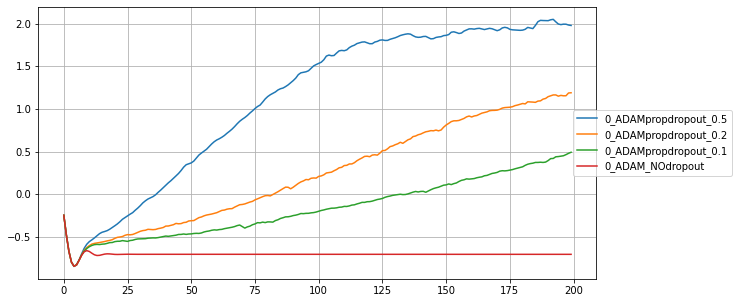

In [ ]:
ITAC.plot_one(8)
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
ITAC.plot_one(9)
plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
# ITAC.plot_one(5)
# plt.legend(loc='center', bbox_to_anchor=(1.1, 0.5))